<a href="https://colab.research.google.com/github/LuisGDP1711/PDSeI_Deteccion_Peso_Cuyes/blob/main/Practicas_U02/P07A_Procesamiento_de_imagenes_en_el_dominio_del_espacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 7A: Filtrado en el espacio
```

**Integrantes:**

1.   Diaz Purizaga Franco
2.   Ortiz Salvador Edinson
3.   Vera Noriega Brayan




### 1. Implemente un algoritmo que permita realizar la correlacion 2D de una imagen de MxN con una mascara de mxn
* El algoritmo debe retornar una imagen de las mismas dimensiones que la imagen de entrada, recuerde que el "padding" usualmente se hace con ceros, no obstante se puede duplicar filas o columnas del borde, o hacerlo mediante un espejo sobre el borde.*

* El algoritmo tambien puede obtener la solución sin necesidad del "padding", agregando varias condicionales que permitan solo ponderar con los datos coincidentes.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def filtro_espacial(imagen, filtro):
    M, N = imagen.shape #Obteniendo las dimensiones de la imagen
    m, n = filtro.shape #Obteniendo las dimensiones del filtro

    filas_add = np.int8((m - 1) / 2)
    columnas_add = np.int8((n - 1) / 2)

    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * filtro
            resultado[i-filas_add, j-columnas_add] = np.sum(multiplicacion)

    return resultado

1. **¿Por qué es importante el uso de técnicas de padding en la aplicación de filtros espaciales?**

Es importante en la aplicación de filtros espaciales porque evita la pérdida de información en los bordes de las imágenes, permitiendo que el filtro se aplique uniformemente en toda la imagen. Esto ayuda a conservar el tamaño original de la imagen.

2. **Explica qué es un kernel (o máscara) en un filtro espacial y cómo influye su tamaño en el procesamiento de imágenes.**

Un *kernel* es una matriz de valores que se aplica sobre una imagen para modificarla, realizando operaciones de convolución.
Los *kernels* pequeños como los de tamaño 3x3, son efectivos para resaltar bordes y texturas en la imagen.
Los *kernels* grandes, como los de tamaño 5x5 o 7x7, afectan áreas mayores, lo que suaviza más la imagen o resalta características amplias, pero con mayor costo computacional.

In [ ]:
img = np.arange(100).reshape(10,10)
filtro = np.ones((5,7))

print(img)
print(filtro)

img_filtrada = filtro_espacial(img, filtro)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


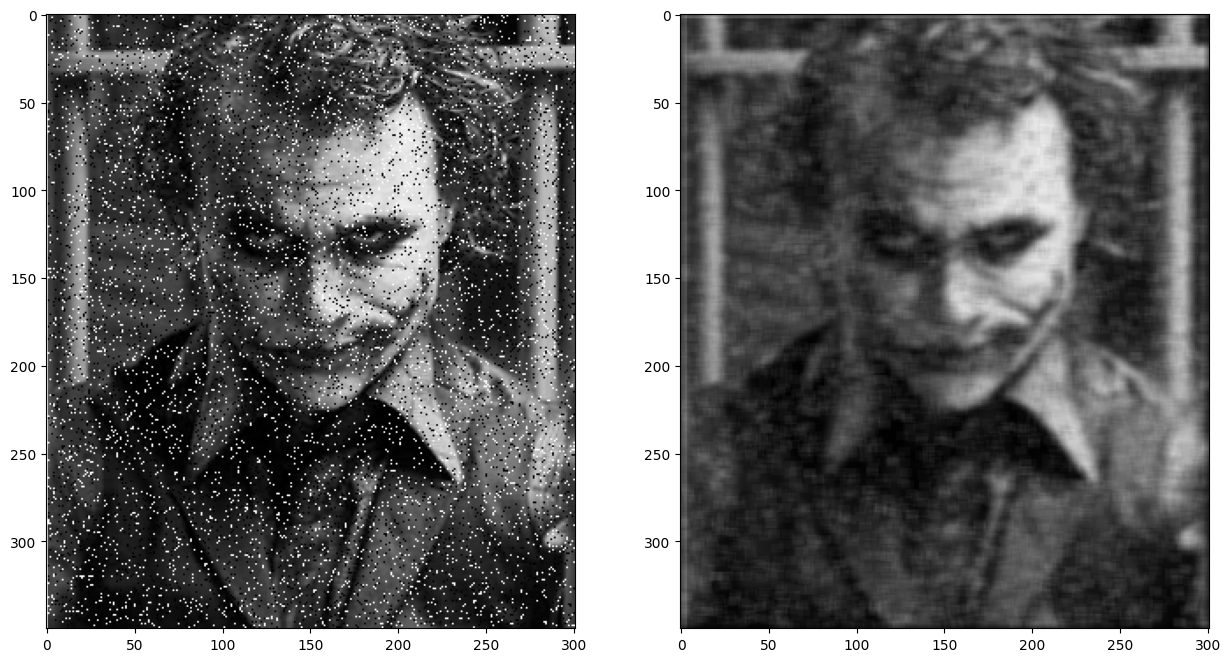

In [ ]:
img_ruido = cv2.imread('/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/ruido.png', 0)/255

filtro = np.ones((5,7))
filtro = filtro/np.sum(filtro)

img_ruido_filtrada = filtro_espacial(img_ruido, filtro)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_ruido, cmap='gray')
plt.subplot(122)
plt.imshow(img_ruido_filtrada, cmap='gray', vmin=0, vmax=1)
plt.show()

### 2.- Implemente un algoritmo que permita mejorar solo los pixeles oscuros y de bajo contraste
*Puede modificar levemente el algoritmo realizado en el enunciado **1** para lograr el objetivo*

In [ ]:
def filtro_espacial_estadistico(imagen, selem = np.ones((3,3))):
    media_global = np.mean(imagen)
    desv_global = np.std(imagen)

    M, N = imagen.shape
    m, n = selem.shape

    filas_add = np.int8((m - 1) / 2)
    columnas_add = np.int8((n - 1) / 2)

    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            media_loc = np.mean(multiplicacion)
            desv_loc = np.std(multiplicacion)

            if (media_loc<media_global) and (desv_loc<0.8*desv_global) and (desv_loc>0.2*desv_global):
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]*1.5
            else:
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]

    return resultado

1. **¿Cuál es el objetivo de este algoritmo y qué tipo de imágenes se benefician más de su aplicación?**

El objetivo es aplicar un filtro espacial estadístico que busca resaltar zonas de la imagen que sean "moderadamente uniformes", es decir, aquellas con una desviación estándar controlada y una media menor a la global. Estas regiones pueden contener detalles sutiles que se beneficiarían de un realce selectivo.
Es útil en imágenes con bajo contraste o con ruido moderado. Al realzar zonas con valores de intensidad más bajos, el filtro puede ayudar a mejorar el contraste en áreas de interés sin amplificar demasiado el ruido ni alterar las áreas homogéneas de la imagen. Esto es especialmente útil en imágenes biomédicas o satelitales donde es importante mejorar detalles específicos sin cambiar el resto de la imagen.

2. **Vecindad y Kernel: ¿Cómo se define la vecindad de un píxel en este código y cuál es la importancia de la variable selem en este contexto?**

La vecindad de un píxel se obtiene extrayendo un bloque de la imagen centrado en ese píxel, de acuerdo con el tamaño de selem, la vecindad de cada píxel incluirá una región de 3x3 alrededor de él, comprendiendo el píxel central y sus ocho vecinos.
El selen determina el tamaño de la vecindad ademas de que puede actuar como filtro o kernel si se modifica para dar diferentes pesos  a los pixeles vecinos.

3. **¿Qué efecto tiene el factor de escala de 1.5 en los píxeles mejorados y cómo podría ajustarse para obtener diferentes resultados?**

El factor de escala de 1.5 multiplica el valor de los píxeles seleccionados, intensificando su brillo o valor de intensidad en un 50%. Esto realza esas áreas específicas, haciéndolas más destacadas en comparación con el resto de la imagen, lo cual es útil para resaltar detalles en zonas de bajo contraste.

*   Aumentar el factor de escala (por ejemplo, a 2.0) hará que los píxeles seleccionados sean aún más brillantes, intensificando el realce, pero también puede introducir artefactos si se exagera.
*   Reducir el factor de escala (por ejemplo, a 1.2) aplicará un realce más sutil, preservando los detalles de la imagen original sin aumentar demasiado el contraste.




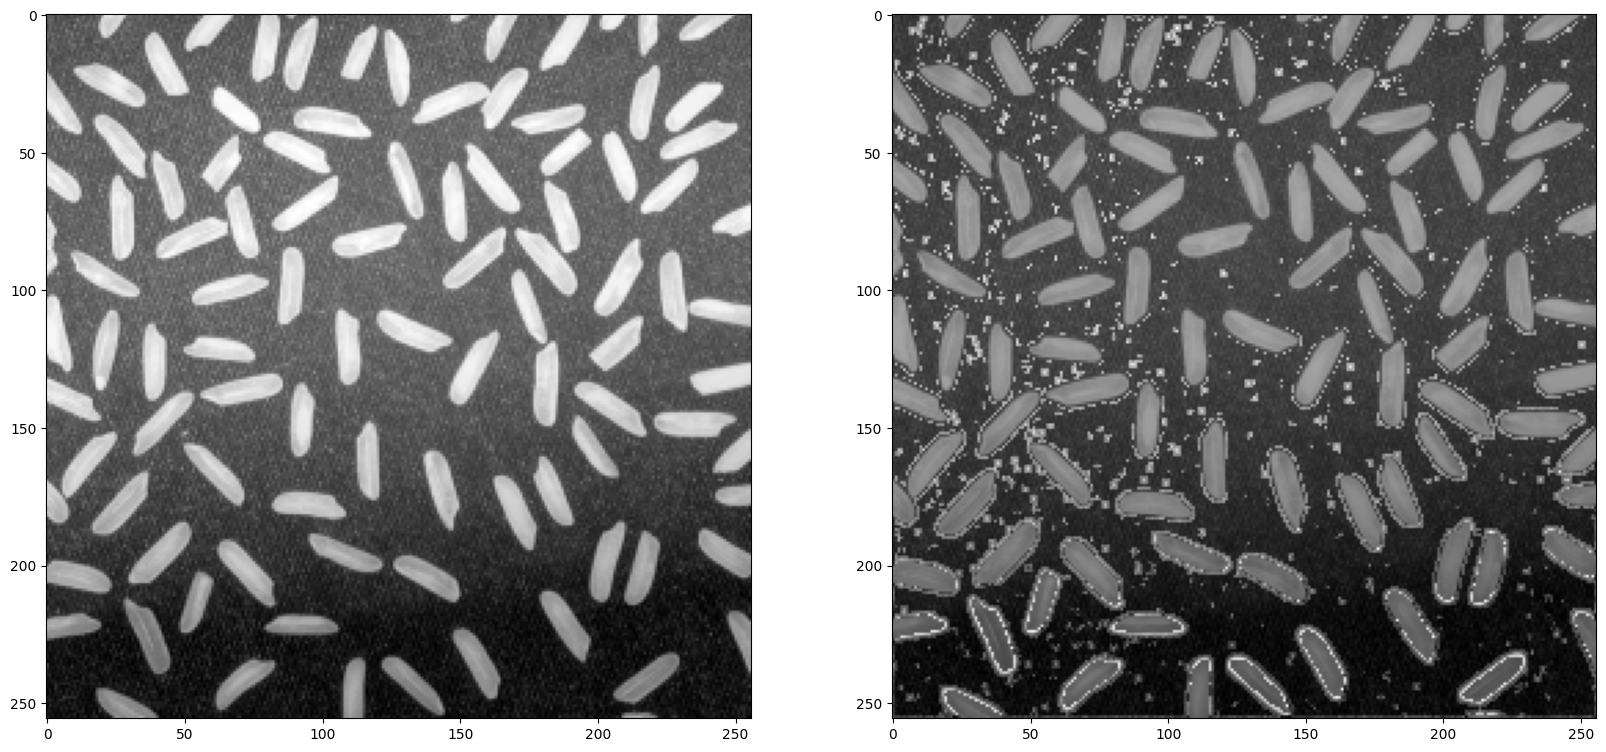

In [ ]:
img_delfin = np.uint16(cv2.imread('/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/rice.png', 0))
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin)
plt.subplots(1,2, figsize=(20,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

### 3.- Implemente los filtros estadisticos min, max, moda y mediana


In [ ]:
from scipy.stats import mode

def filtro_espacial_estadistico(imagen, filter_type, selem = np.ones((3,3))):
    M, N = imagen.shape
    m, n = selem.shape

    filas_add = np.int8((m - 1) / 2)
    columnas_add = np.int8((n - 1) / 2)

    #img_pad = np.zeros((M+ filas_adicionales*2, N + columnas_adicionales*2))
    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            if filter_type =='min':
                resultado[i-filas_add, j-columnas_add] = np.min(multiplicacion)
            elif filter_type == 'max':
                resultado[i-filas_add, j-columnas_add] = np.max(multiplicacion)
            elif filter_type == 'median':
                resultado[i-filas_add, j-columnas_add] = np.median(multiplicacion)
            elif filter_type == 'mode':
                resultado[i-filas_add, j-columnas_add] = mode(multiplicacion, axis=None)[0]

    return resultado

1. **¿Qué es un filtro estadístico en el procesamiento de imágenes y cómo se aplica en el código mostrado?**

Un filtro estadístico en el procesamiento de imágenes es una técnica que utiliza medidas estadísticas de los valores de los píxeles en una vecindad para modificar o mejorar la imagen. Los filtros estadísticos analizan los valores de los píxeles vecinos para decidir cómo ajustar el píxel central. Esto puede ayudar a eliminar ruido, resaltar características o realizar otras mejoras en la imagen.

El código implementa un filtro estadístico que permite seleccionar diferentes tipos de filtros mediante la variable filter_type.
Para cada píxel, se extrae la vecindad y se aplica el tipo de filtro especificado.


2. **¿Qué diferencias existen entre los filtros de tipo min, max, median y mode? Explica en qué situaciones sería adecuado usar cada tipo.**

*   min: Reemplaza el píxel central por el valor mínimo de la vecindad, útil para eliminar ruidos brillantes.
*   max: Reemplaza el píxel central por el valor máximo de la vecindad, ayuda a resaltar características brillantes.
*   median: Reemplaza el píxel central por la mediana de la vecindad, efectivo para eliminar ruido mientras se preservan los bordes.
*   mode: Reemplaza el píxel central por el valor más frecuente en la vecindad, útil en imágenes con valores discretos.



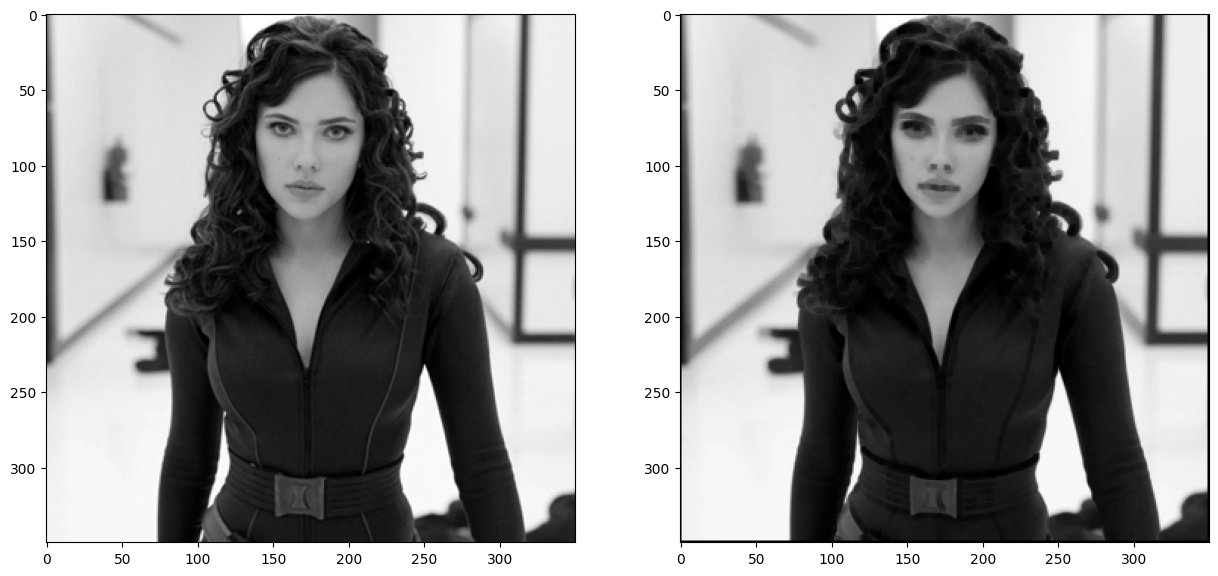

In [ ]:
#MINIMO
img_delfin = np.uint16(cv2.imread('/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/scarlett_oc.png', 0))
filter_type = 'min'
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin,filter_type)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

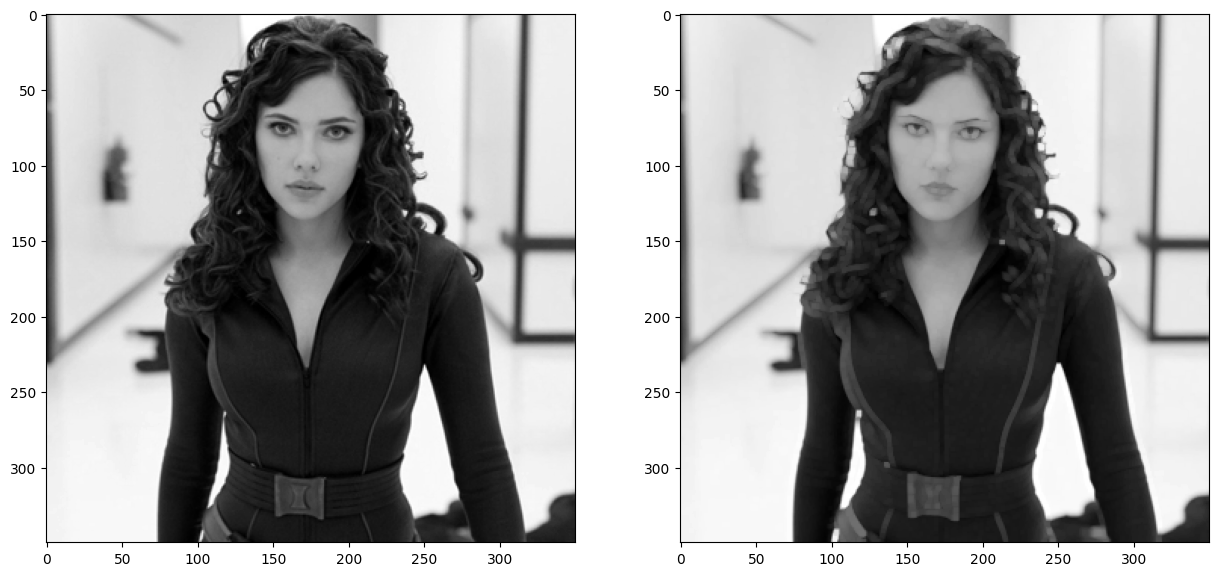

In [ ]:
#MAX
filter_type = 'max'
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin,filter_type)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

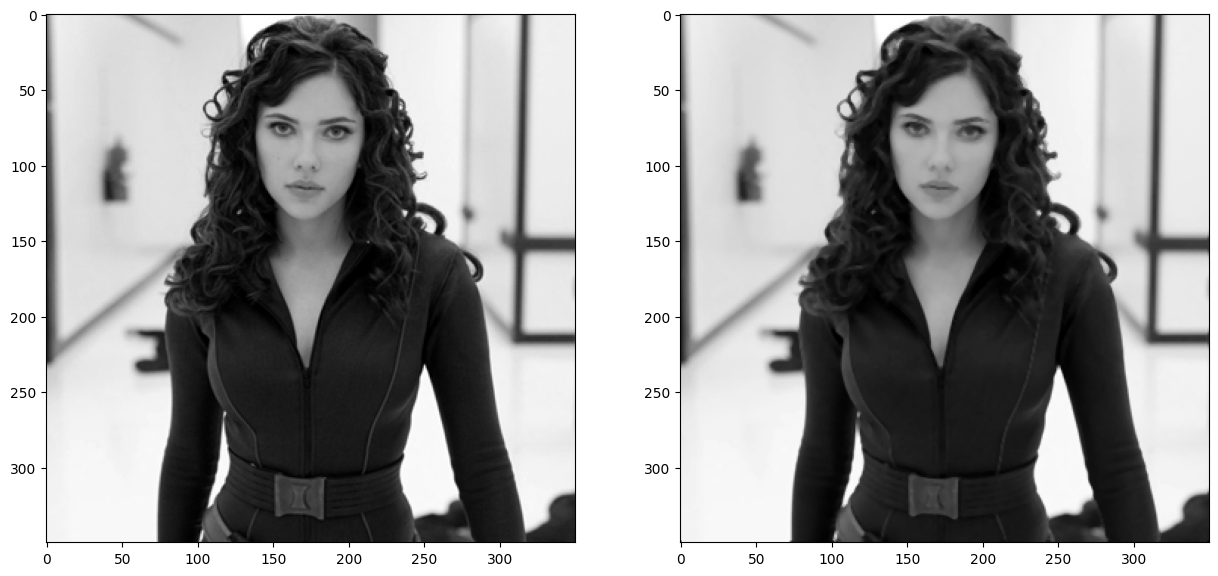

In [ ]:
#MEDIANA
filter_type = 'median'
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin,filter_type)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

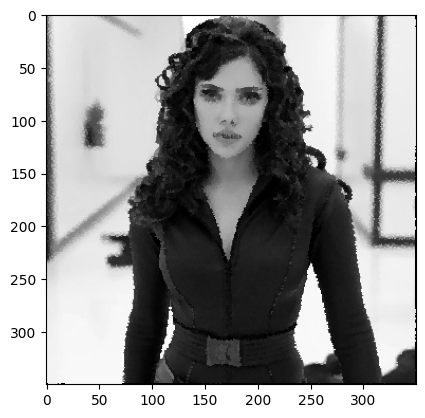

In [ ]:
filter_type = 'mode'
img_median_mode = filtro_espacial_estadistico(img_delfin,filter_type)
plt.imshow(img_median_mode, cmap='gray')
plt.show()

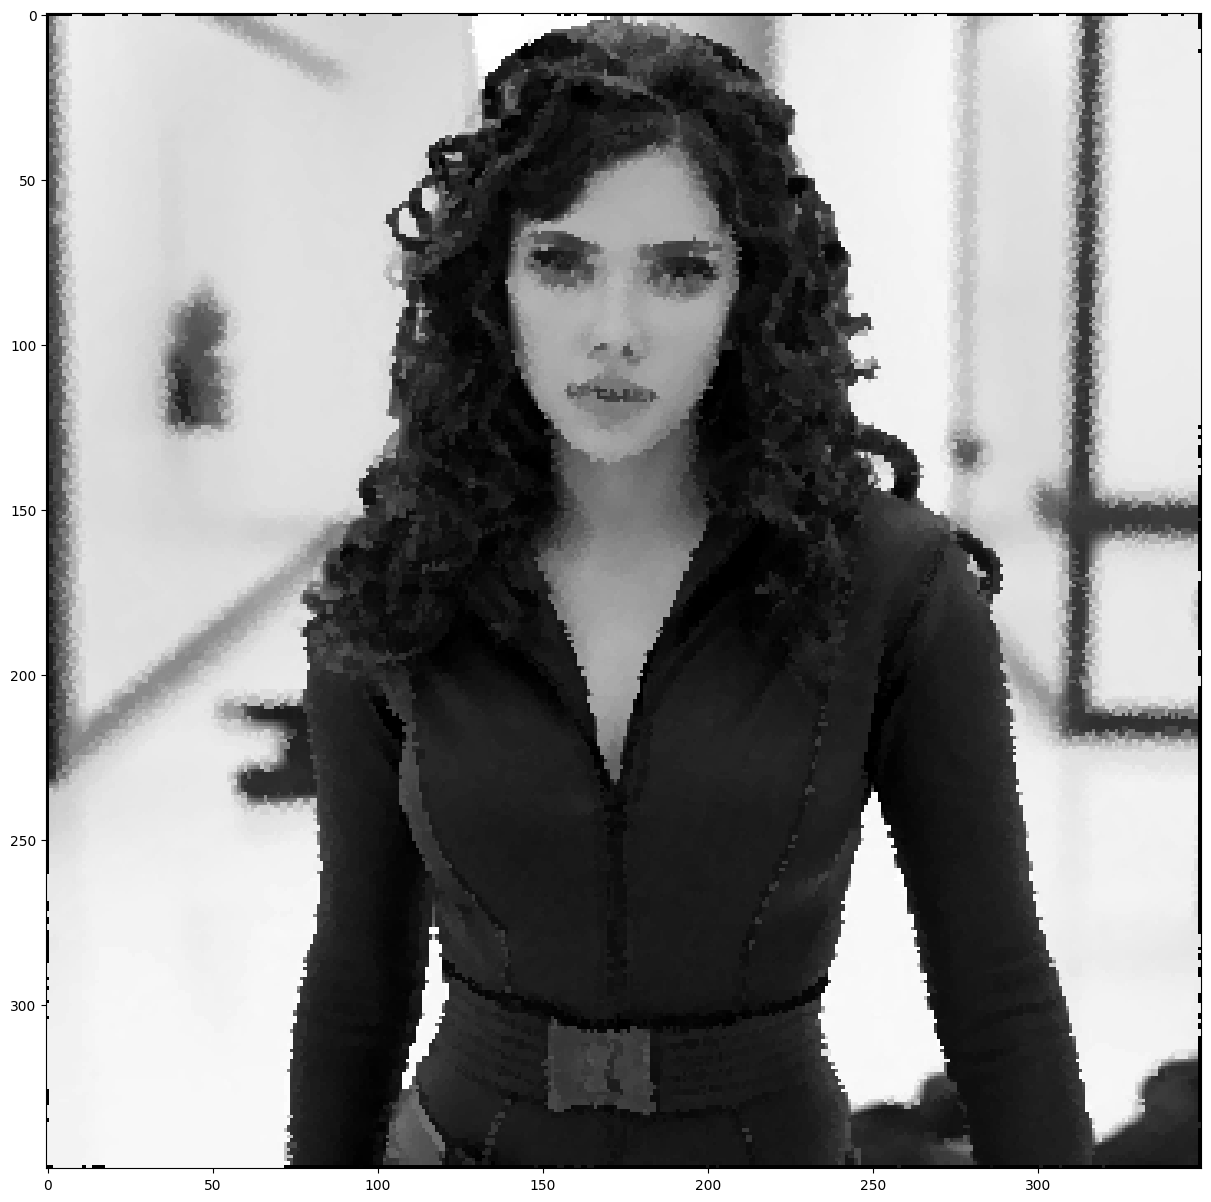

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img_median_mode, cmap='gray')
plt.show()

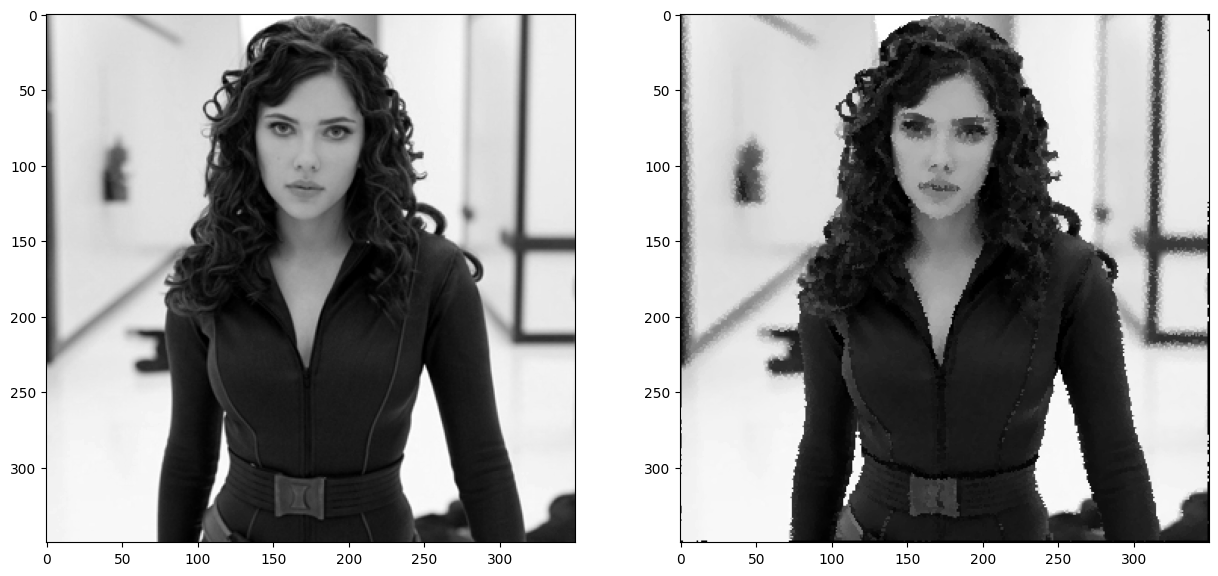

In [ ]:
#MODA
filter_type = 'mode'
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin,filter_type)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

### 4.- Implemente los filtros espaciales de suavizado y nitidez explicados en clase

Utilizando la funcion **convolve2d(img, kernel, mode= "same")** de **scipy.signal** y los kernels:
(tambien se puede usar **correlate2d**)
* Promedio
* Gaussiano
* Laplaciano


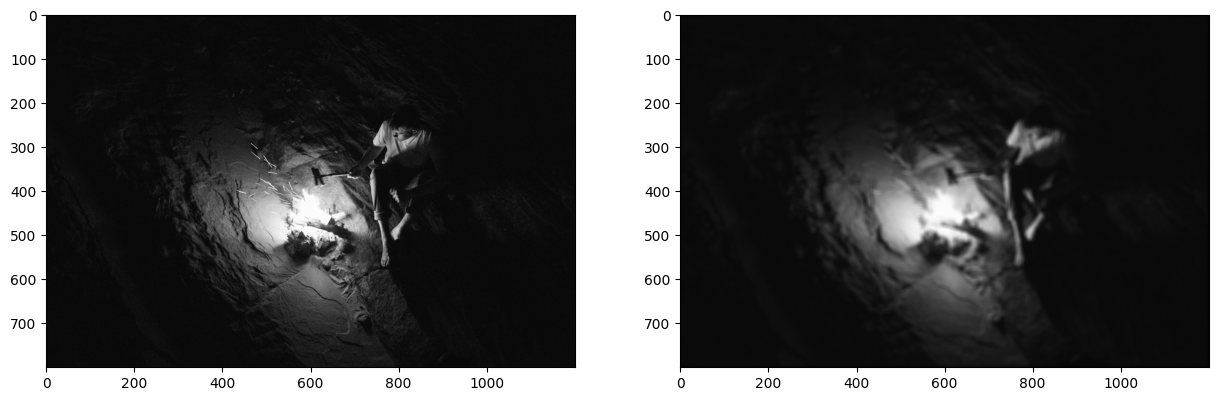

In [ ]:
#PROMEDIO
from scipy import signal

img = cv2.imread("/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/thumbnail.png", 0)/255
kernel = np.ones((11,11))/121

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

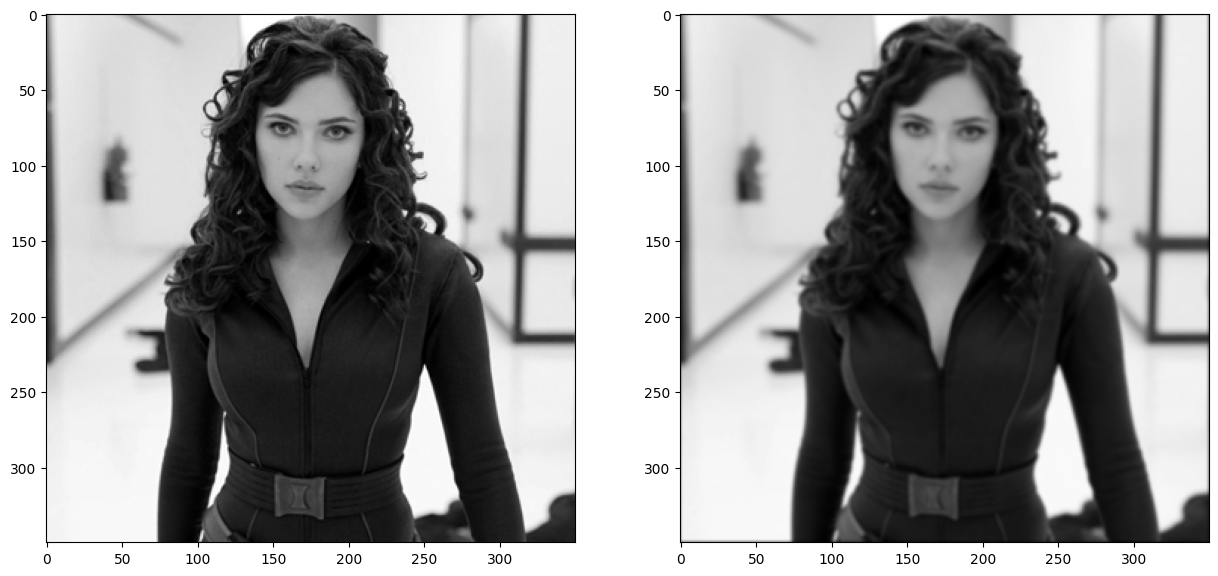

In [ ]:
#PROMEDIO
from scipy import signal

img = cv2.imread("/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/scarlett_oc.png", 0)/255
# kernel = np.array([[1,2,1], [2,4,2], [1,2,1]])/16
kernel = np.array([1,4,7,4,1])*np.array([[1],[4],[7],[4],[1]])
kernel = kernel/np.sum(kernel)

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

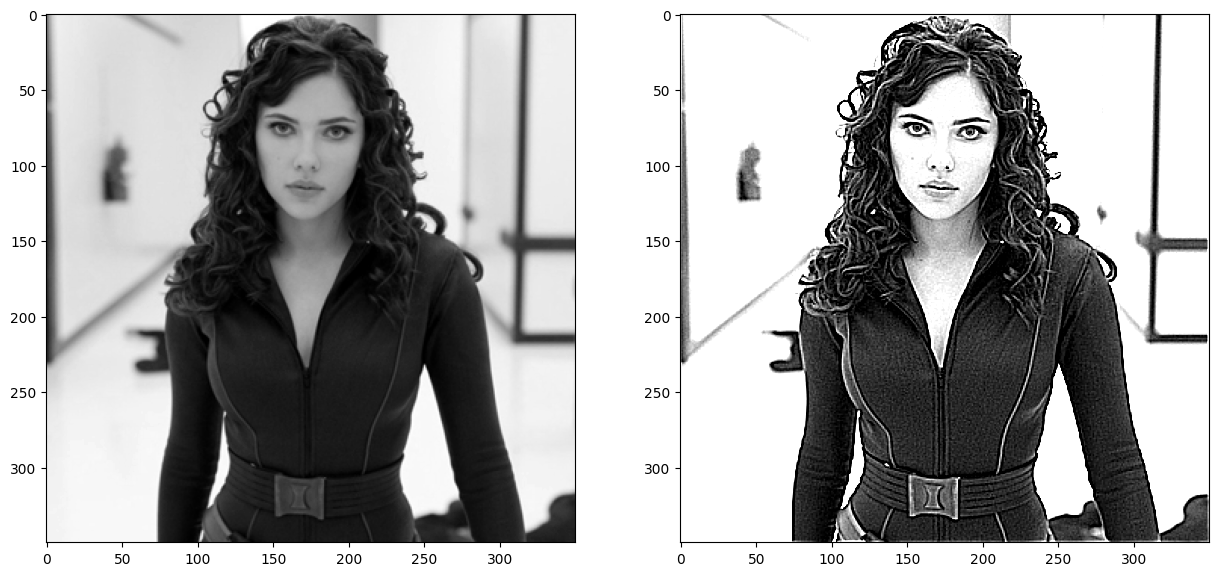

In [ ]:
#LAPLACIANO
from scipy import signal
A = 1.5
img = cv2.imread("/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/scarlett_oc.png", 0)/255
kernel = np.array([[-1,-1,-1], [-1,A+8,-1], [-1,-1,-1]])

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

**Utilizando OpenCV:**
* cv2.blur(img, (Tamaño_kernel))
* cv2.GaussianBlur(img,(Tamaño_kernel),desviacion_estandar)
* cv2.medianBlur(img,Tamaño_kernel)
* cv2.bilateralFilter(img,tamaño_kernel,sigmacolor,sigmaspace)  [Mas info](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html)

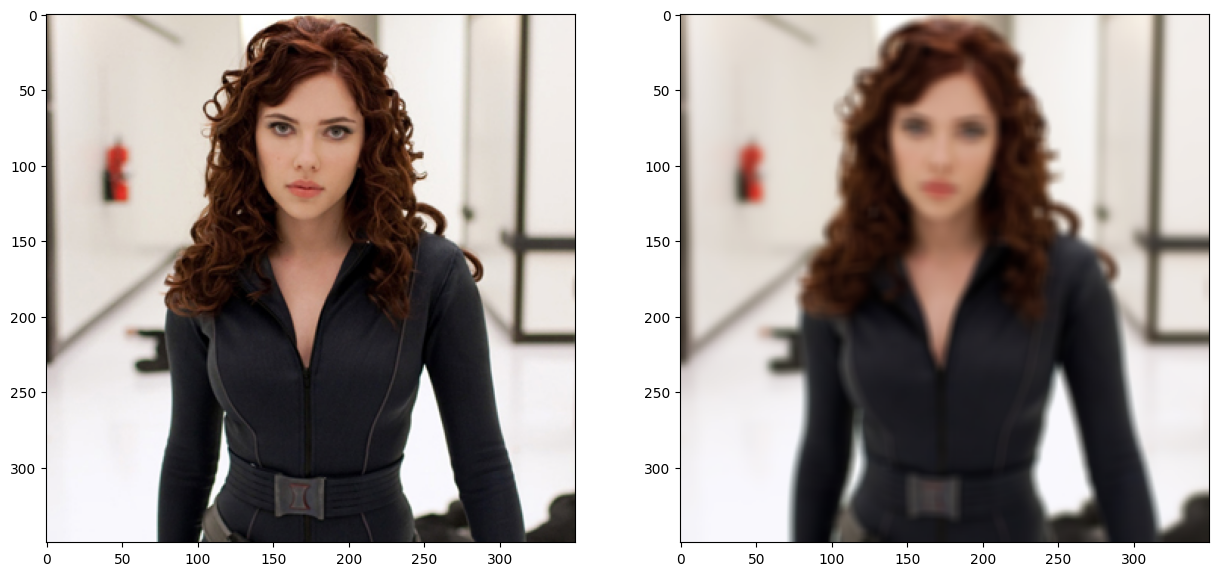

In [ ]:
img = cv2.imread("/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/scarlett_oc.png")[..., ::-1]

out = cv2.blur(img, (7,7))

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

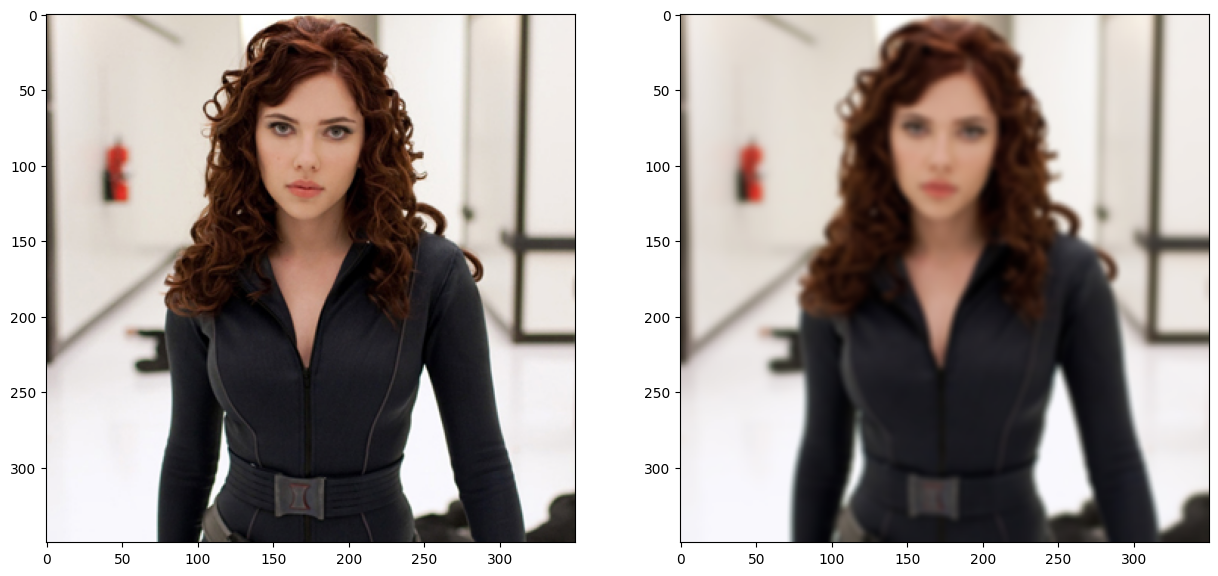

In [ ]:
out = cv2.GaussianBlur(img,(7,7), 2)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

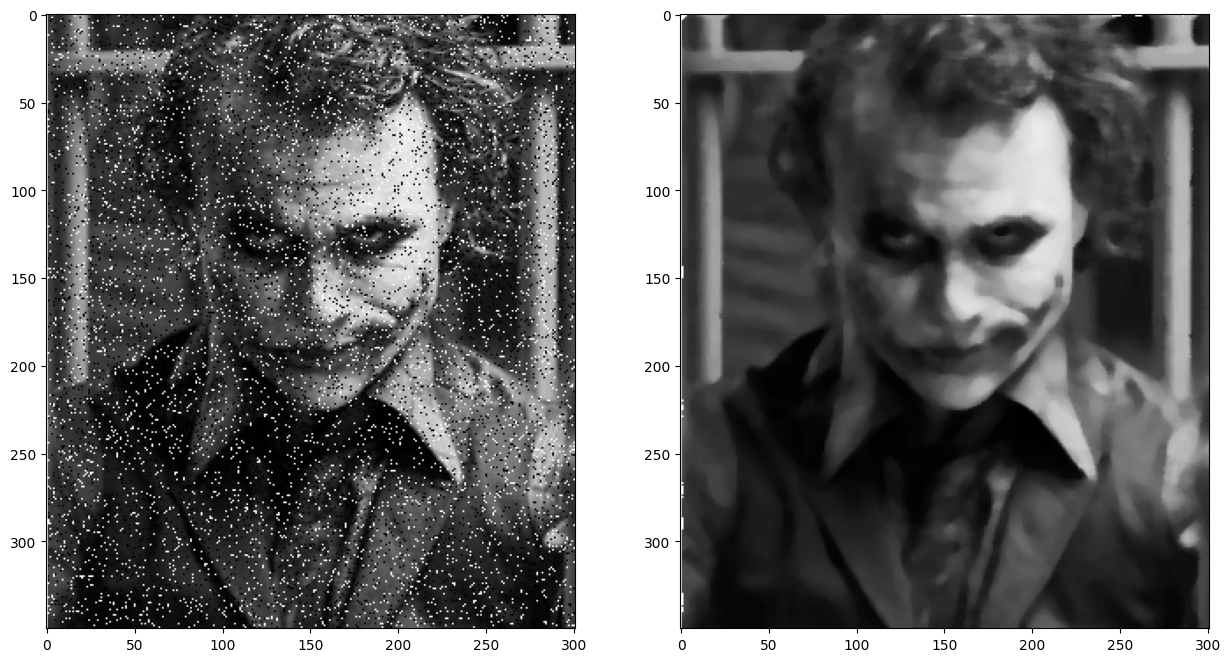

In [ ]:
img_joker = cv2.imread('/content/drive/MyDrive/CICLO VIII/PDSI/Imagenes/ruido.png')[..., ::-1]

img_joker_filtrada = cv2.medianBlur(img_joker, 7)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_joker, cmap='gray')
plt.subplot(122)
plt.imshow(img_joker_filtrada, cmap='gray')
plt.show()

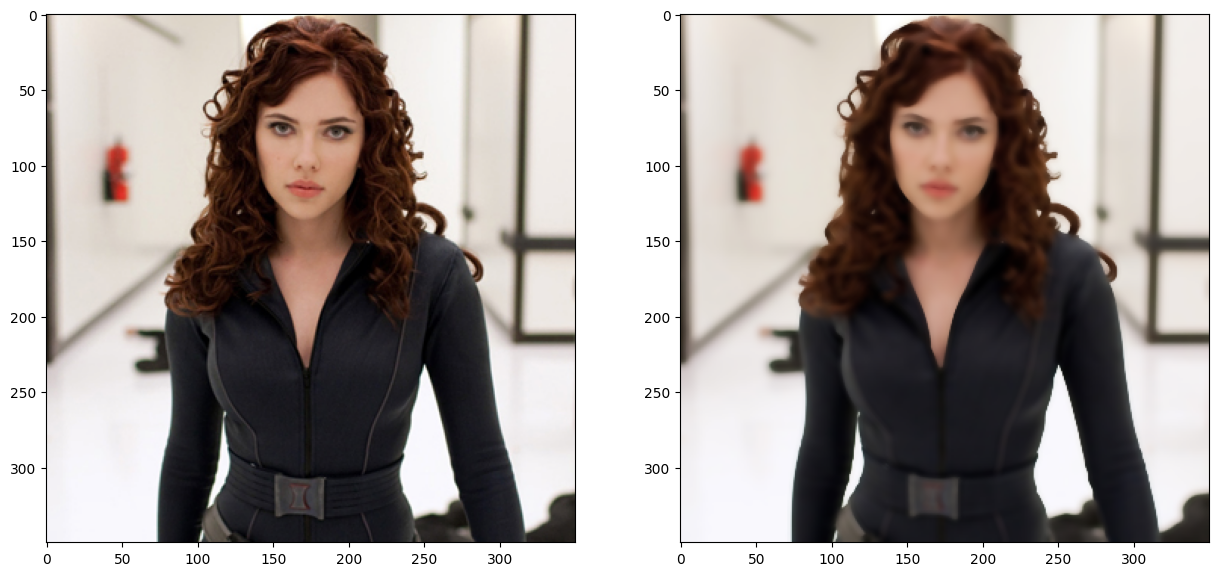

In [ ]:
out = cv2.bilateralFilter(img,7, 160, 160)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

1. **¿Cuál es la diferencia fundamental entre los filtros de suavizado (como el de promedio y el Gaussiano) y los filtros de nitidez (como el Laplaciano)?**

Filtros de Suavisado: se utilizan para reducir el ruido y las variaciones bruscas en la intensidad de los píxeles en una imagen, generando una imagen menos detallada pero más suave.

*   Filtro de Promedio: Reemplaza el valor de un píxel con el promedio de los valores de los píxeles en su vecindario. Esto tiende a suavizar la imagen al reducir las diferencias bruscas entre píxeles adyacentes.
*   Filtro Gaussiano: Similar al filtro de promedio, pero aplica un peso mayor a los píxeles más cercanos al píxel central, utilizando una distribución gaussiana. Esto resulta en un suavizado más natural y menos distorsionado.


Filtros de Nitidez: se utilizan para aumentar el contraste y la definición de los bordes en una imagen. Su objetivo es realzar los detalles y hacer que la imagen se vea más clara y definida.

*   Filtro Laplaciano: Detecta bordes y detalles al resaltar áreas donde hay cambios bruscos en la intensidad de los píxeles. Esto se logra al calcular la segunda derivada de la imagen, lo que acentúa las regiones de alto contraste.


2. **¿Cuáles son las principales diferencias en los resultados obtenidos al aplicar un filtro de promedio versus un filtro Gaussiano?**

El filtro promedio reemplaza cada píxel en la imagen con el promedio de los valores de los píxeles del área del kernell. El filtro gaussiano, considera el promedio ponderado en vez de un promedio general en el kernell, considerando los píxeles centrales con un peso mayor que los lejanos, obteniendo un suavizado más efectivo en el centro que disminuye hacia los bordes



3. **¿Qué propiedades tiene el kernel Laplaciano y cómo contribuye a la nitidez de la imagen? ¿Qué efectos visuales produce al aplicarse a una imagen?**

Permite la deteccion de bordes dado a que se basa en una operación de doble derivada, por lo que mide la "aceleración" del cambio de intensidad, por lo que resalta las áreas donde el gradiente cambia rápidamente, otra propiedad es la isotropía, en donde se obtiene la misma respuesta en todas las direcciones (permitiendo la detección de los bordes en múltiples orientaciones). Atribuye a la nitideez resaltando los bordes y los detalles finos. Efectos visuales: aumento de contraste en bordes, Aumento o disminución del brillo.


4. **¿Qué significa el argumento mode="same" en la función convolve2d y cómo afecta el tamaño de la imagen resultante después de aplicar el filtro?**

Controla el tamaño de la imagen resultante después de aplicar la convolución 2D;indica cómo se deben manejar los bordes de la imagen al aplicar el filtro.Como el tamaño de la salida es el mismo que el de la imagen de entrada, se debe rellenar la imagen antes de aplicar la convolución para asegurar que los bordes se procesen correctamente. Sin el relleno, los píxeles en los bordes tendrían menos vecinos que los píxeles centrales, lo que podría resultar en una imagen de salida más pequeña.

### 5.- Implemente un algoritmo para muestre el uso de la mascara de desenfoque (unsharp mask) y el filtro de altoaumento (Highboost)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


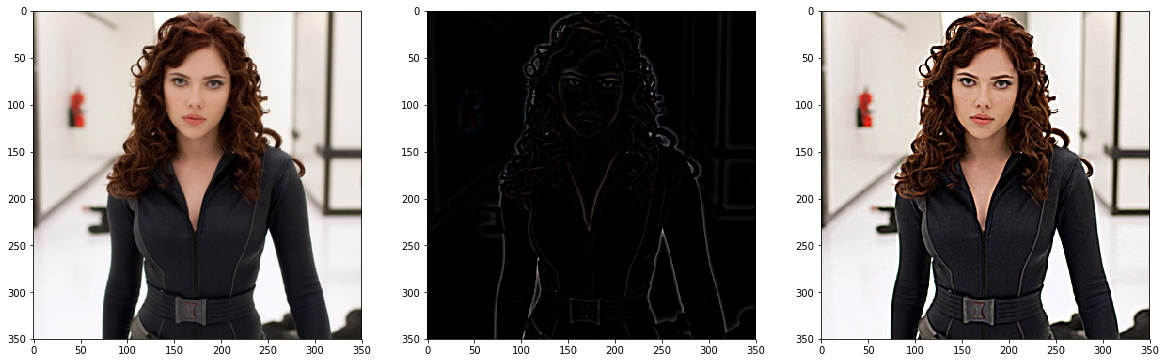

In [ ]:
img = cv2.imread("../Imagenes/scarlett_oc.png")[..., ::-1]/255

blur = cv2.blur(img, (7,7))

mask = img - blur

unsharp_image = mask + img

plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.subplot(132)
plt.imshow(mask, cmap="gray")
plt.subplot(133)
plt.imshow(unsharp_image, cmap='gray', vmin=0, vmax=1)
plt.show()

1. **¿Cómo funciona la máscara de desenfoque (unsharp mask) para realzar los detalles de una imagen, y cuál es el papel del filtro de suavizado en este proceso?**

Realza los detalles de una imagen mediante la creación de una versión suavizada de la imagen original, usando el filtro gaussiano, para luego restar la imagen suavizada de la original, resaltando los bordes y las áreas de alto contraste, lo obtenido se suma a la imagen original y se aumenta la intensidad de píxeles en donde se presentan cambios abruptos.


2.  **¿En qué se diferencia el filtro de alto aumento (Highboost) de la máscara de desenfoque estándar, y cómo se puede ajustar el factor de amplificación (boosting factor) para controlar el nivel de realce en la imagen?**

La máscara de desenfoque resta la imagen suavizada de la imagen original (genera una máscara que resalta los bordes). Mientras que el desenfoque estándar, además de realizar esta resta, multiplica la máscara por un factor de amplificación antes de sumarla a la original, lo que permite un realce más significativo. Si el  factor de amplificación es 1, se comporta de manera similar que el desenfoque estándar, si es mayor a 1, aumenta el realce (hace más notorios los detalles y los bordes más nítidos), si es menor a 1, proporciona un efecto de suavizado (disminuye el contraste y hace menos pronunciados los detalles)

### 6.- Implemente un algoritmo para mostrar la gradiente de una imagen
**Use las mascaras:**
* Roberts
* Prewit
* Sobel
* Scharr

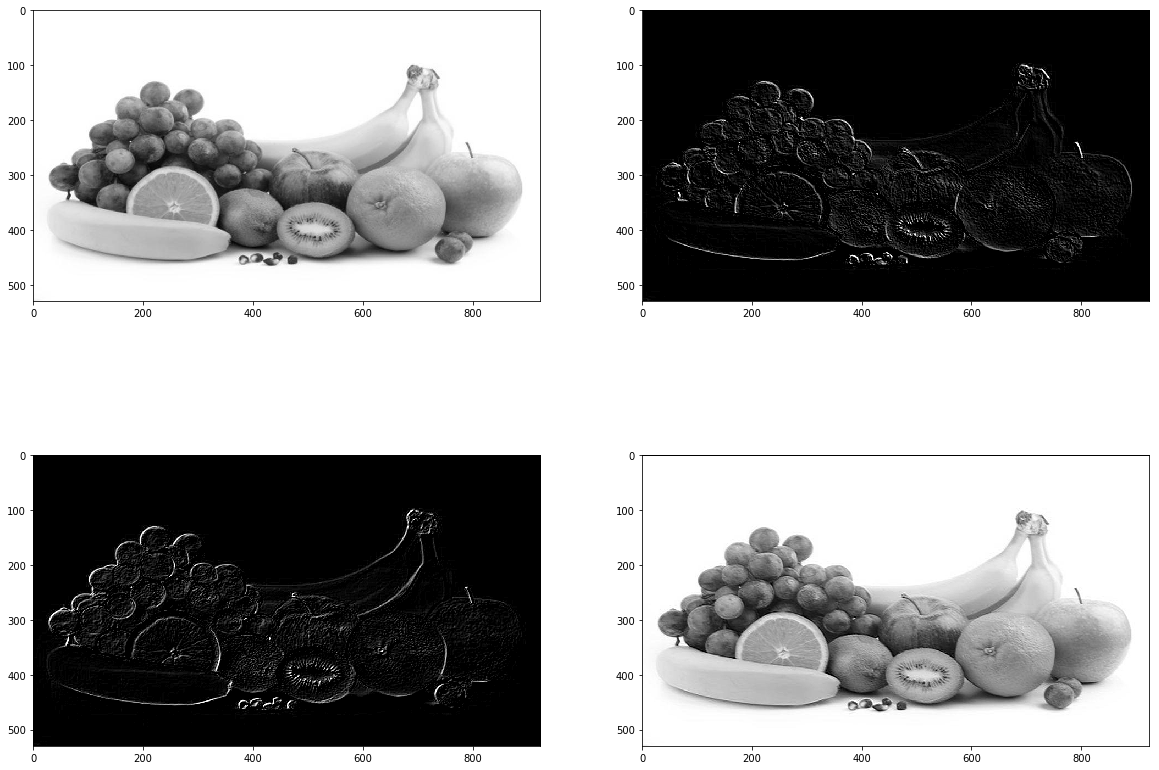

In [ ]:
#ROBERTS
img = cv2.imread("../Imagenes/frutas.jpg", 0)/255

kernelh = np.array([[0,-1],[1,0]])
kernelv = np.array([[-1,0],[0,1]])

outh = signal.convolve2d(img, kernelh, mode= "same")
outv = signal.convolve2d(img, kernelv, mode= "same")

outf = outh + outv

plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.subplot(222)
plt.imshow(outh * 5, cmap="gray", vmin=0, vmax=1)
plt.subplot(223)
plt.imshow(outv * 5, cmap="gray", vmin=0, vmax=1)
plt.subplot(224)
plt.imshow(outf + img, cmap="gray", vmin=0, vmax=1)
plt.show()

1. **¿Cuál es la característica distintiva de la máscara de Roberts al calcular el gradiente de una imagen, y por qué podría ser menos precisa que otras máscaras?**

La característica distintiva es que utiliza un enfoque de cálculo de gradiente en diagonal mediante pequeños kernels de 2x2. Es menos precisa dado a que, al usar kernels pequeños, se realiza un enfoque más localizado lo que lo hace más sensible a los ruidos.


2. **¿Cómo afectan las máscaras de Sobel y Scharr a la precisión y sensibilidad en la detección de bordes en una imagen? ¿En qué casos se prefiere una sobre la otra?**

Sobel: Mediante el uso de kernels de 3x3 se promedia la intensidad de los píxeles, lo que lo hace menos sensible a los ruidos, generando bordes suaves y continuos. Esto genera que se prefiera en casos donde se soliciten bordes pronunciados y continuos

Scharr: Usa el cálculo de derivadas en los píxeles, mediante un kerner de 3x3, lo que genera una mayor presición en la derección de bordes, dado a que genera una respuesta mayor en bordes agudos y/o cambios de intensidad, lo que lo hace más sensible a bordes delgados y finos. Se prefiere cuando se tienen imágenes con detalles finos o bordes agudos.